# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Alya Saphira
- **Email:** alya.22060@mhs.unesa.ac.id
- **ID Dicoding:** alya_saphira__P4mD

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?
- Bagaimana hubungan cuaca terhadap jumlah pengguna sepeda?
- Bagaimana kondisi penyewaan ketika sepeda digunakan pada workingday, holiday, dan weekday?
- Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda berdasarkan Casual ataupun Registered?

## Import Semua Packages/Library yang Digunakan

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap Gathering Data, kita mengumpulkan data yang telah dikumpulkan. Lalu saya mengambil **Bike Sharing Dataset**. Disini saya memilih salah satu data dan mengimpor yaitu `day.csv`

### Load Label day

In [120]:
url='https://raw.githubusercontent.com/alysaphiraa/bike-sharing-dataset/refs/heads/main/day.csv'
day_df = pd.read_csv(url, encoding='unicode_escape')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
 - menampilkan 5 baris pertama dari DataFrame `day_df` seperti pada gambar.




### Assessing Data

In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [122]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat disimpulkan tabel day_df tidak ada missing values, yang berarti aman.

In [123]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df` menggunakan `info()`. terdapat 1 tipe data berdasarkan kolomnya tidak sesuai. Data yang perlu diperbaiki adalah: **dteday** menjadi **datetime**
- memeriksa dengan menggunakan `method describe()` parameter statistik dari kolom numerik yang terdapat dalam `day_df`.


### Cleaning Data

In [124]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'season': 'season_labels',
    'weathersit': 'weather_labels',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,dateday,season_labels,year,month,holiday,weekday,workingday,weather_labels,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [125]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })

In [126]:
day_df['season_labels'] = day_df['season_labels'].map({
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [127]:
day_df['weather_labels'] = day_df['weather_labels'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})

In [128]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season_labels'] = day_df.season_labels.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_labels'] = day_df.weather_labels.astype('category')

day_df.head()

,instant,dateday,season_labels,year,month,holiday,weekday,workingday,weather_labels,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [129]:
datetime_columns = ["dateday"]

for column in datetime_columns:
  day_df[column]=pd.to_datetime(day_df[column])

In [130]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         731 non-null    int64         
 1   dateday         731 non-null    datetime64[ns]
 2   season_labels   731 non-null    category      
 3   year            731 non-null    category      
 4   month           731 non-null    category      
 5   holiday         731 non-null    category      
 6   weekday         731 non-null    category      
 7   workingday      731 non-null    category      
 8   weather_labels  731 non-null    category      
 9   temp            731 non-null    float64       
 10  atemp           731 non-null    float64       
 11  hum             731 non-null    float64       
 12  windspeed       731 non-null    float64       
 13  casual          731 non-null    int64         
 14  registered      731 non-null    int64         
 15  count 

**Insight:**
- mengganti tipe data kolom `dtday` menjadi `datetime`

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [131]:
day_df.describe(include="all")

,instant,dateday,season_labels,year,month,holiday,weekday,workingday,weather_labels,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,Aug,0.0,Mon,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [132]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-132-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [133]:
day_df.groupby(by='weather_labels').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-133-ced42185f22e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_labels').agg({


count                           
                 max  min         mean      sum
weather_labels                                 
Clear           8714  431  4876.786177  2257952
Light Rain      4639   22  1803.285714    37869
Mist            8362  605  4035.862348   996858

In [77]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-77-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [78]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-78-7bfa45d53d30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [79]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-79-fb984321fedb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [80]:
day_df.groupby(by='season_labels').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-80-0f8b370e98e8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season_labels').agg({


casual   registered count                   
                      mean         mean   max   min         mean
season_labels                                                   
Fall           1202.611702  4441.691489  8714  1115  5644.303191
Springer        334.928177  2269.204420  7836   431  2604.132597
Summer         1106.097826  3886.233696  8362   795  4992.331522
Winter          729.112360  3999.050562  8555    22  4728.162921

In [134]:
day_df.groupby(by='season_labels').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

<ipython-input-134-ce1e07e68cae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season_labels').agg({


temp                         atemp                      \
                    max       min      mean       max       min      mean   
season_labels                                                               
Fall           0.861667  0.469167  0.706309  0.840896  0.242400  0.655898   
Springer       0.572500  0.059130  0.297748  0.548617  0.079070  0.296914   
Summer         0.808333  0.253043  0.544405  0.757579  0.250339  0.520307   
Winter         0.657500  0.220833  0.422906  0.607975  0.227913  0.415539   

                    hum                      
                    max       min      mean  
season_labels                                
Fall           0.939565  0.360000  0.633482  
Springer       0.948261  0.000000  0.582903  
Summer         0.922500  0.254167  0.626948  
Winter         0.972500  0.333478  0.668719

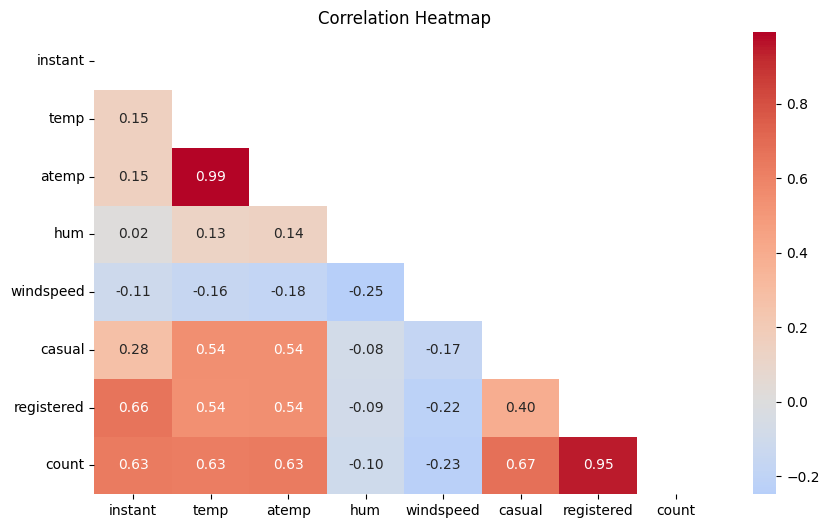

In [135]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

atemp dan temp sangat berkorelasi (0.99).
hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).

casual cukup berkorelasi dengan temp dan atemp (-0.16 dan -0.18) , dan sedikit negatif dengan hum (-0.08).

windspeed berkolerasi negatif dengan temp dan atemp  (0.54), dan hum (-0.25).

registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).

count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

In [83]:
day_df.registered.sum()

2672662

**Insight:**
- Menuliskan dataset characters pada `season` dan `weather`
- Menemukan hubungan antara `temp` dengan `season`

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana hubungan pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?


<ipython-input-136-481622890dda>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season_labels')[['registered', 'casual']].sum().reset_index()


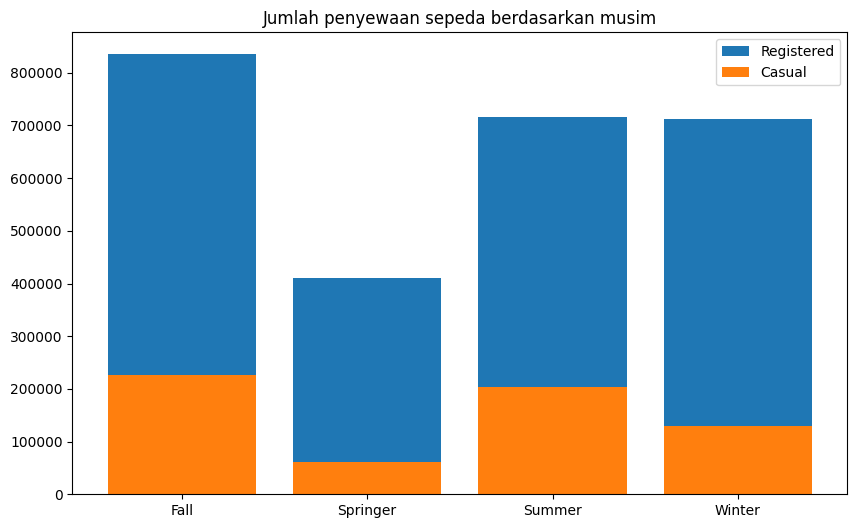

In [136]:
seasonal_usage = day_df.groupby('season_labels')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season_labels'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season_labels'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()


Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Springer).


### Pertanyaan 2:
Bagaimana hubungan cuaca terhadap jumlah pengguna sepeda?

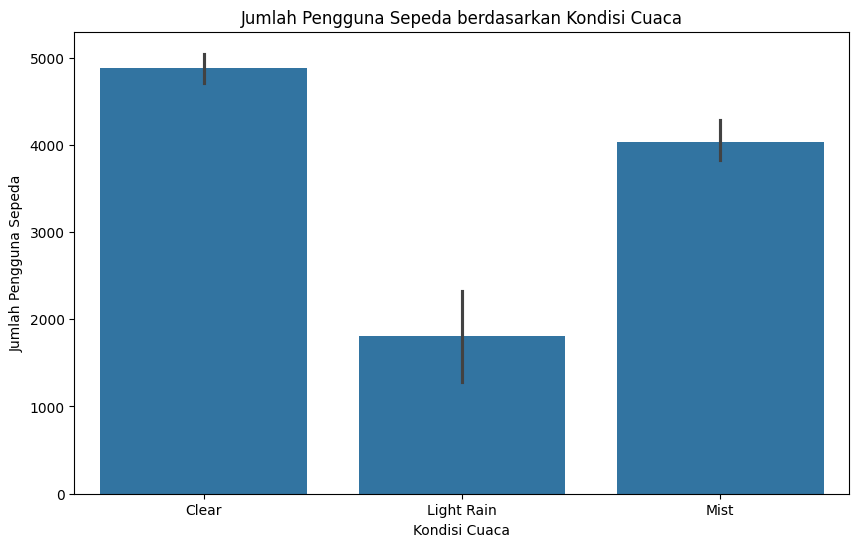

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_labels',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan saat cuaca sedang sedikit bersalju/hujan yang paling sedikit diminati.


###Pertanyaan 3

Bagaimana kondisi penyewaan ketika sepeda digunakan pada workingday, holiday, dan weekday?

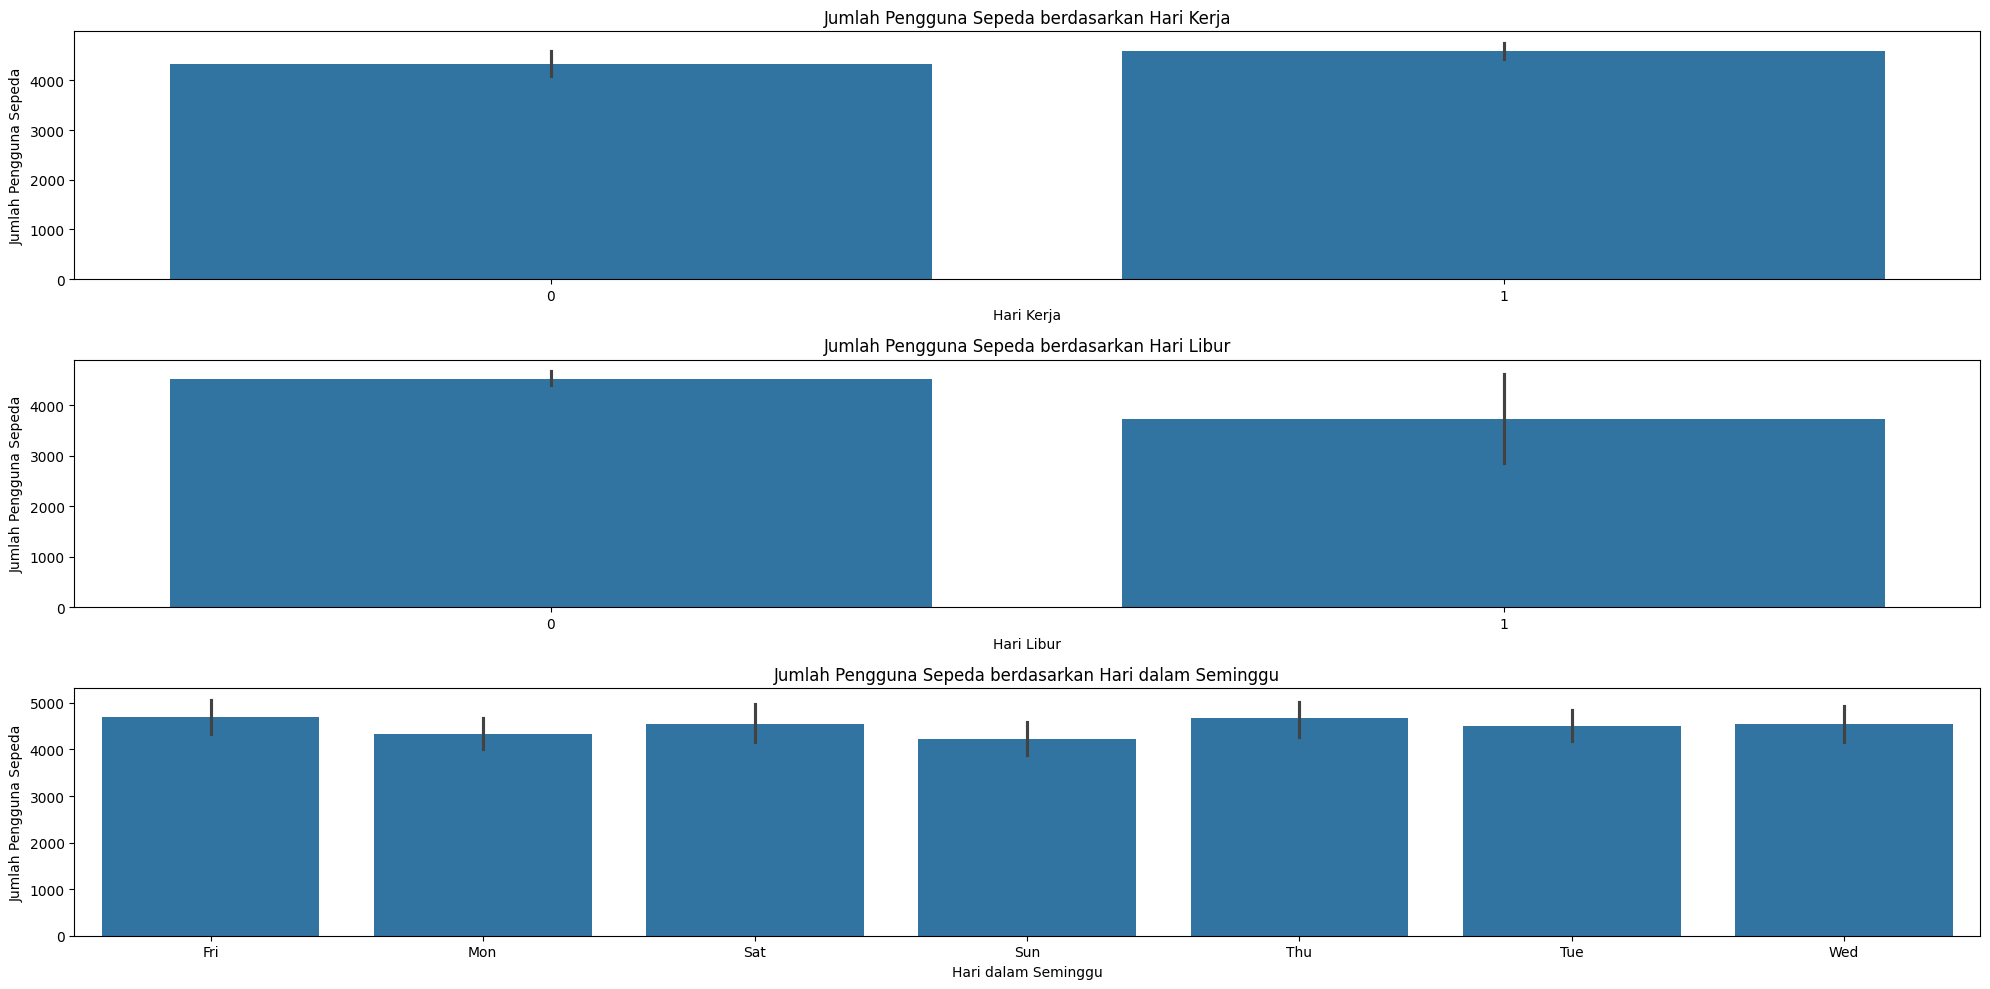

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data diatas menggunakan barplot, didapat pernyataan sebagai berikut:

Jumlah penyewa sepeda lebih banyak pada hari kerja (senin - jumat) dibandingkan akhir pekan (sabtu dan minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.
Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).
Jumlah penyewa sepeda pada hari Jumat menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda paling sedikit.

###Pertanyaan 4
Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda berdasarkan Casual ataupun Registered?

Text(0.5, 1.0, 'Humidity vs Count')

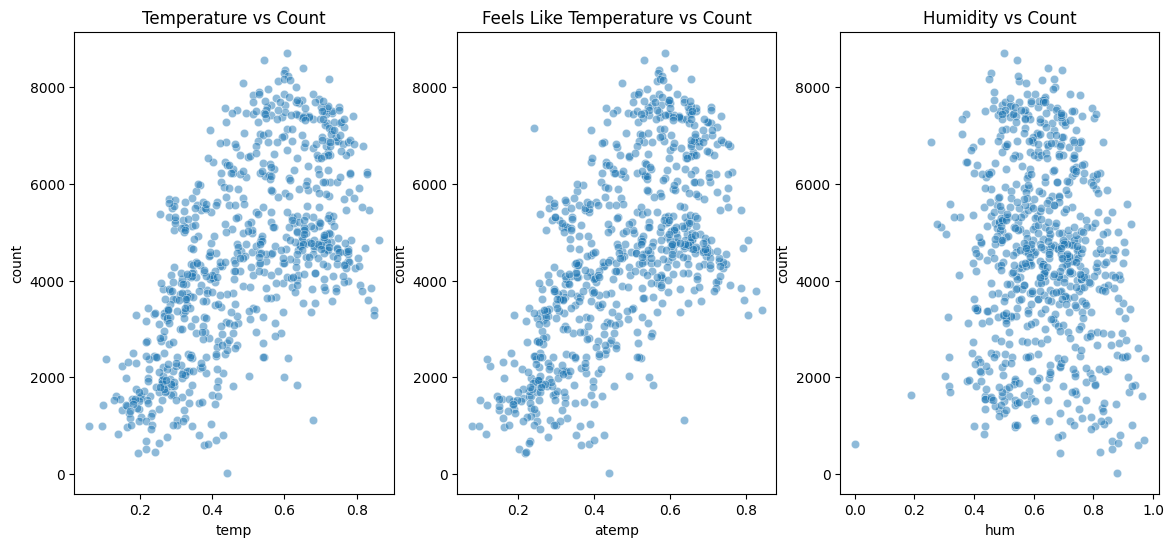

In [87]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')


Berdasarkan hasil analisis diatas menggunakan scatter plot, dapat kita tarik pernyataan sebagai berikut:

Hubungan antara temp dan count ternyata menunjukan korelasi yang positif diantara dua variabel.
Hubungan antara atemp dan count menunjukan korelasi yang positif diantara dua variabel.
Sementara untuk hum dan count ternyata menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu nampak.

Kesimpulannya jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Dan pengaruh dari humidity sepertinya sangat kecil disini, walaupun cenderung dapat menurunkan jumlah pengguna sepeda.

## Conclusion

- Conclution pertanyaan 1
  *  Pada visualisasi pertanyaan 1, asil yang diperoleh cukup menunjukkan bahwa musim dingin (Winter) tidak menempati posisi terakhir, melainkan yang terakhir adalah musin semi (Springer). Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sedangkan urutan pertamanya ditempati oleh musim gugur (Fall) yang mampu meraih penyewaan sepeda sebanyak lebih dari 800000.
- Conclution pertanyaan 2
  * Dapat terlihat terdapat hubungan diantara keduanya. Para penyewa sepeda sangat menyukai ketika cuaca sedang Cerah/Sedikit mendung dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000. Lalu posisi kedua ditempati ketika cuaca sedang Berkabut/Mendung dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000. Sementara Pengguna kurang menyukai ketika suasana sedang Sedikit bersalju/Hujan dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000. Dan untuk cuaca ketika Badai Besar tidak memunculkan data, karena memang tidak memungkinan untuk melakukan kegiatan bersepeda ketika kondisi cuaca tersebut.
-Conclusion 3
   * Kondisi yang tampak pada visualisasi di atas terbagi menjadi tiga bagian. Untuk jumlah pengguna sepeda berdasarkan workingday yang mengungguli non-workingday walau hasilnya memang tidak terlalu signifikan, tetapi tetap terdapat perbedaan yang jelas walaupun keduanya sama-sama diatas 4000 jumlah pengguna. Lanjut berdasarkan holiday (hari libur), tetapi yang bukan hari libur yang menang dengan perbedaan yang cukup signifikan daripada yang holiday. Hal ini mungkin pengguna lebih menyukai sewa sepeda saat hari-hari biasa saja. Terakhir berdasarkan weekday, berdasarkan data diatas, Hari Jumat (Fri) yang menempati urutan pertama  di urutan terakhir ditempati oleh Minggu (Sun).
- Conclusion 4
    * Dari visualisasi yang ditampilkan, disimpulkan bahwa temp dan atemp memiliki korelasi positif dengan count, sehingga jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Terbalik dengan Humidity yang memiliki korelasi negatif dengan count walaupun sangat minim (tidak terlalu signifikan), tetapi tetap dapat menurunkan jumlah pengguna sepeda ketika humiditynya meningkat.



In [88]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         731 non-null    int64         
 1   dateday         731 non-null    datetime64[ns]
 2   season          731 non-null    int64         
 3   year            731 non-null    category      
 4   month           731 non-null    category      
 5   holiday         731 non-null    category      
 6   weekday         731 non-null    category      
 7   workingday      731 non-null    category      
 8   weathersit      731 non-null    int64         
 9   temp            731 non-null    float64       
 10  atemp           731 non-null    float64       
 11  hum             731 non-null    float64       
 12  windspeed       731 non-null    float64       
 13  casual          731 non-null    int64         
 14  registered      731 non-null    int64         
 15  count 

In [89]:
day_df.to_csv("main_data.csv", index=False)